**Background:**

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

**Data Description:**

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

**Attributes:**

* age : age of customer (numeric)

* job : type of job (categorical)

* marital : marital status (categorical)

* education (categorical)

* default: has credit in default? (binary)

* balance: average yearly balance, in euros (numeric)

* housing: has a housing loan? (binary)

* loan: has personal loan? (binary)

* contact: contact communication type (categorical)

* day: last contact day of the month (numeric)

* month: last contact month of year (categorical)

* duration: last contact duration, in seconds (numeric)

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**Output (desired target):**

* y - has the client subscribed to a term deposit? (binary)

**Download Data:**

https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

**Goal(s):**

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
exp = df.shape
print(f"Number of rows: {exp[0]}\nNumber of columns: {exp[1]}")

Number of rows: 40000
Number of columns: 14


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


### Checking for null values in all columns

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

**Univariate analysis**

####  Age and Duration distribution

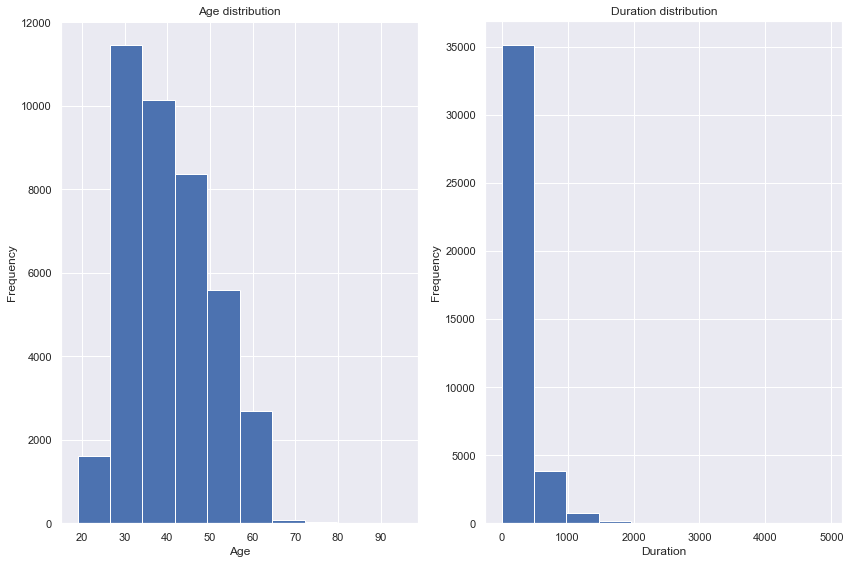

In [7]:
fig, axis=plt.subplots(nrows=1, ncols = 2, figsize=(12,8))
df["age"].plot.hist(ax=axis[0]).set(xlabel="Age", title="Age distribution")
df["duration"].plot.hist(ax=axis[1]).set(xlabel="Duration", title="Duration distribution")
plt.tight_layout()
plt.show();

In [8]:
def count_on(on):
    viz= sns.countplot(df[on],  palette= 'coolwarm')
    viz.set(title= f'Count of {on}', xlabel= f'{on}')

### checking if the Target variable is balance


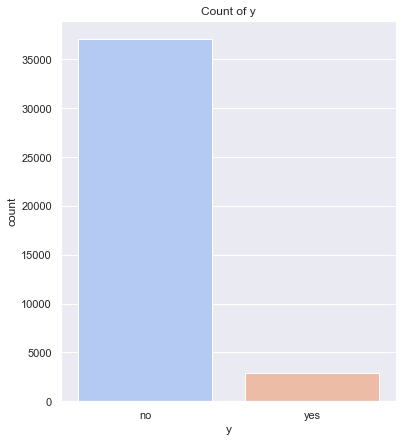

In [9]:
plt.figure(figsize=(6,7))
count_on("y")

### Marital

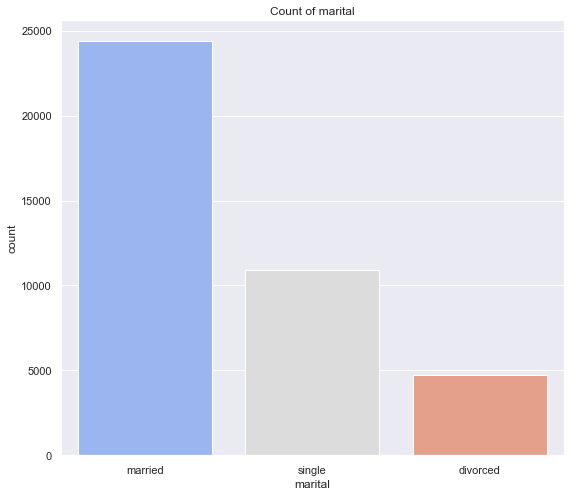

In [10]:
plt.figure(figsize= (9, 8))
count_on('marital')

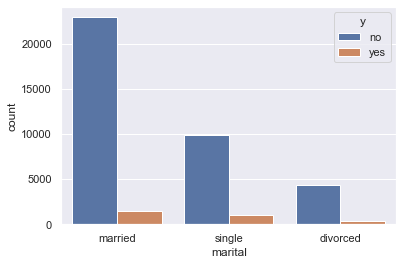

In [11]:
sns.countplot(x= 'marital', data= df, hue= 'y');

### Education

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Education')]

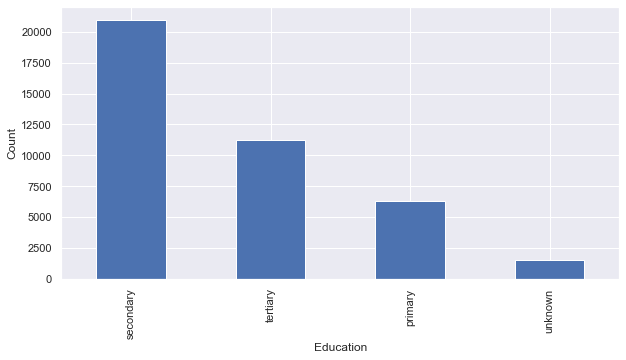

In [12]:
ed =df["education"].value_counts()
print(ed)
plt.figure(figsize=(10,5))
ed.plot.bar().set(ylabel="Count", xlabel="Education")

### Job

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64


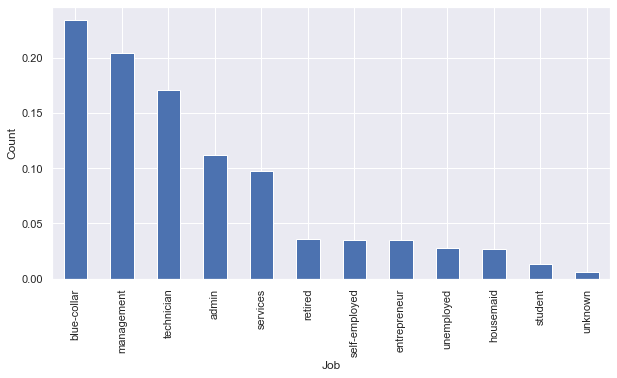

In [13]:
print(df["job"].value_counts())
plt.figure(figsize=(10,5))
df["job"].value_counts(normalize=True).plot(kind="bar").set(ylabel="Count", xlabel="Job");

### Education VS Age and Target

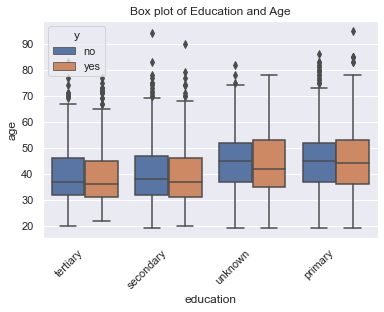

In [14]:
plot = sns.boxplot(x= "education", y="age", hue="y", data= df)
plt.xticks( rotation=45, horizontalalignment='right' )
plot.set_title(f'Box plot of Education and Age');

## Marital VS Age & Target

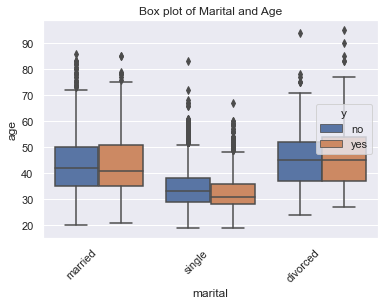

In [15]:
plot = sns.boxplot(x= "marital", y="age", hue="y", data= df)
plt.xticks( rotation=45, horizontalalignment='right' )
plot.set_title(f'Box plot of Marital and Age');

### Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df.job = lbe.fit_transform(df.job)
df.marital =lbe.fit_transform(df.marital)
df.education =lbe.fit_transform(df.education)
df.default =lbe.fit_transform(df.default)
df.housing =lbe.fit_transform(df.housing)
df.loan = lbe.fit_transform(df.loan)
df.contact =lbe.fit_transform(df.contact)
df.month = lbe.fit_transform(df.month)
df.y  =lbe.fit_transform(df.y)

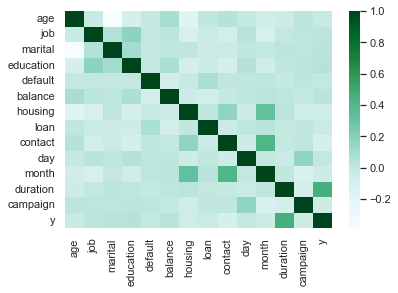

In [17]:
sns.heatmap(df.corr(), cmap="BuGn");

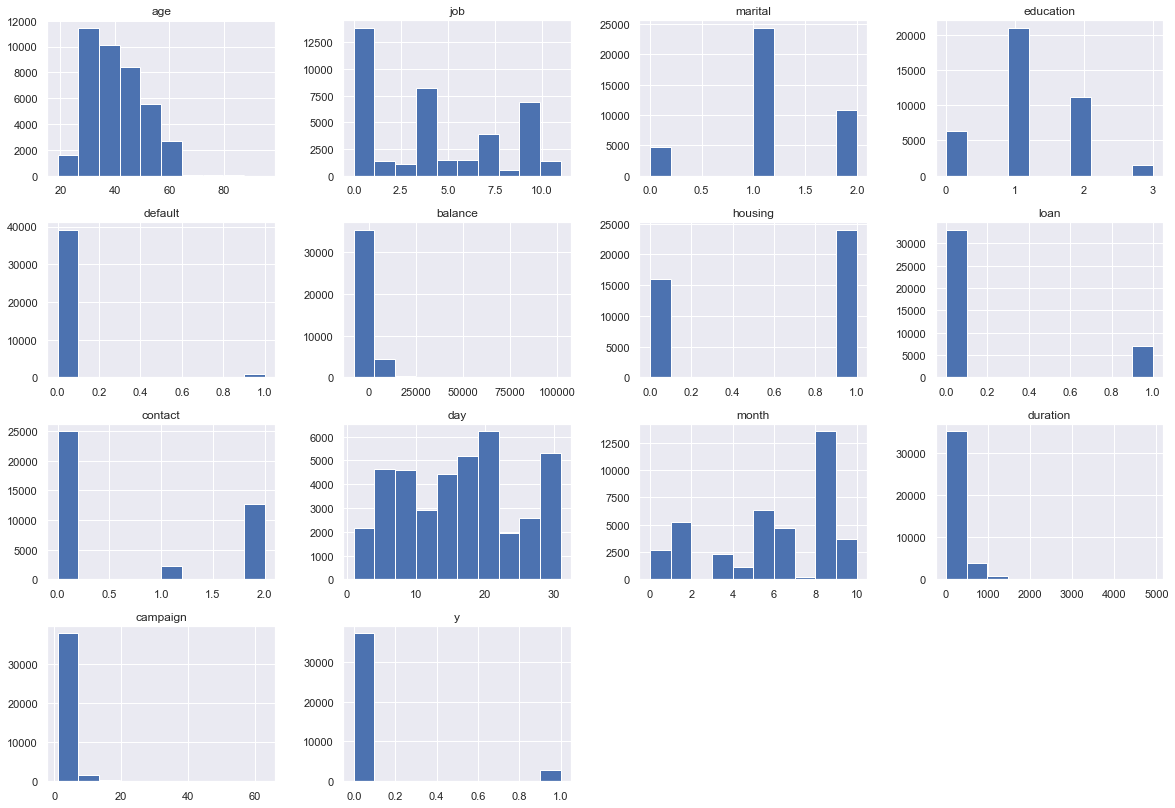

In [18]:
df.hist(figsize=(20,14))
plt.show();

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


#### Splitting data using train test split

In [20]:
y = df["y"]
X= df.drop("y", axis=1)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [23]:
print(f'X train shape: {X_train.shape}\nY train shape: {y_train.shape}\nX test shape: {X_test.shape}\nY test shape: {y_test.shape}')

X train shape: (32000, 13)
Y train shape: (32000,)
X test shape: (8000, 13)
Y test shape: (8000,)


### Model Training


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=None)
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [25]:

def my_custom_loss_func(y_true, y_pred):
    true_positives = ((y_true ==1) &(y_pred==1)).sum()
    false_negatives =((y_true ==1) &(y_pred==0)).sum()
    recalls =true_positives/(true_positives +false_negatives)
    accuracy =(y_true ==y_pred).sum()/len(y_pred)
    
    result =recalls
    return result

scorer =make_scorer(my_custom_loss_func, greater_is_better=True)

### 1 .Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

lr_params ={
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "C":[5,10,20]
}

lr =LogisticRegression(verbose=3)
lr_model = GridSearchCV(lr, lr_params, scoring="roc_auc", cv=5, n_jobs=3, verbose=3)
lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(verbose=3), n_jobs=3,
             param_grid={'C': [5, 10, 20],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=3)

In [27]:
lr_predictions = lr_model.predict(X_train)
lr_probas = lr_model.predict_proba(X_train)
print("Logistic Regression Best Score : " + "{:.2f}%".format(lr_model.best_score_*100))
print("Logistic Regression Accuracy: " + "{:.2f}%".format(100*np.array(lr_predictions == y_train).sum() / len(X_train)))
print("Logistic Regression Precision Score: " + "{:.2f}%".format(100*precision_score(y_train, lr_predictions)))
print("Logistic Regression Recall Score: " + "{:.2f}%".format(100*recall_score(y_train, lr_predictions)))

Logistic Regression Best Score : 89.49%
Logistic Regression Accuracy: 93.22%
Logistic Regression Precision Score: 58.77%
Logistic Regression Recall Score: 22.62%


### 2. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=8, verbose = 0)
rf_model.fit(X_train, y_train)
cross_val_score(rf_model, X=X_train, y=y_train, scoring="roc_auc", cv = 5, n_jobs=-3, verbose=0)

array([0.92670417, 0.94112926, 0.94306456, 0.92967506, 0.92343977])

In [29]:
rf_predictions = rf_model.predict(X_train)
rf_probas = rf_model.predict_proba(X_train)
print("Random Forest ROC_AUC : " + "{:.2f}%".format(roc_auc_score(y_train, rf_probas[:,1])*100))
print("Random Forest Accuracy: " + "{:.2f}%".format(100*np.array(rf_predictions == y_train).sum() / len(X_train)))
print("Random Forest Precision Score: " + "{:.2f}%".format(100*precision_score(y_train, rf_predictions)))
print("Random Forest Recall Score: " + "{:.2f}%".format(100*recall_score(y_train, rf_predictions)))

Random Forest ROC_AUC : 95.21%
Random Forest Accuracy: 94.43%
Random Forest Precision Score: 91.82%
Random Forest Recall Score: 25.59%


### 3. XGBoost

In [30]:
import xgboost

xgb_model = xgboost.XGBClassifier(objective='binary:logistic',min_child_weight=10, subsample=0.35, colsample_bytree=0.35, max_depth=3, learning_rate=0.01, n_estimators=1000,silent=True, nthread=-3)
xgb_model.fit(X_train, y_train)
cross_val_score(xgb_model, X=X_train, y=y_train, scoring="roc_auc", cv = 5, n_jobs=-3, verbose=0)

[12:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([0.92627406, 0.93540053, 0.94102925, 0.92627841, 0.92119829])

In [31]:
xgb_predictions = xgb_model.predict(X_train)
xgb_probas = xgb_model.predict_proba(X_train)
print("XGBoost ROC_AUC : " + "{:.2f}%".format(roc_auc_score(y_train, xgb_probas[:,1])*100))
print("XGBoost Accuracy: " + "{:.2f}%".format(100*np.array(xgb_predictions == y_train).sum() / len(X_train)))
print("XGBoost Precision Score: " + "{:.2f}%".format(100*precision_score(y_train, xgb_predictions)))
print("XGBoost Forest Recall Score: " + "{:.2f}%".format(100*recall_score(y_train, xgb_predictions)))

XGBoost ROC_AUC : 93.57%
XGBoost Accuracy: 93.62%
XGBoost Precision Score: 65.47%
XGBoost Forest Recall Score: 25.85%


In [32]:
df[(df['age']<=35) & (df['age']>=20)]['y'].mean()

0.0844889399986471

In [33]:
df[(df['age']>=60)]['y'].mean()

0.18019257221458046

## Using Tensorflow

In [34]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [35]:
model=Sequential()
model.add(Dense(units=32, activation="relu", 
               input_dim = len(X_train.columns)))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics="accuracy")

In [37]:
model.fit(X_train, y_train, epochs=100,batch_size=32 )

Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 7/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 8/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 9/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 10/100
1000/1000 [=============

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 77/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 78/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 79/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 80/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 81/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 82/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 83/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9273
Epoch 85/100
1000/1000 [=================

In [38]:
y_hat =model.predict(X_test)
accuracy_score(y_test, y_hat)

0.928625

**Which Customers are more likely to buy? (Customer Segmentation)**

Age: People are significantly more likely to subscribe at their later ages(60+) and they are more likely to subsribe at early(20-35) ages. The ages in between, they are less likely to subscribe.

Default: Default information is not a very good predictor

Balance: People with higher balance has more chances of subscribing. In dataset, there are lots of people with zero balance(probably does not have account on bank), the people with zero balance are less likely to subscribe. (It can be people with no account as well because they will probably depositing on a bank in which they allready have an account.)

Housing: The people without a housing loan are more likely to subscribe

Loan: Loan information is not a very good predictor.

Job: Management levels are more likely and Blue Collars are less likely to subscribe.

Marital: Single people are more likely and Married people are less likely to subscribe.

Education: People with tertiary education are more likely to subscribe, other education types does are not very significant predictors.

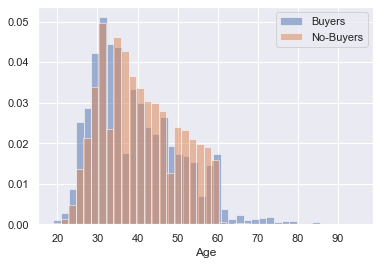

In [39]:
age_data = df[['age','y']]
buyers = age_data[age_data['y']==1]
no_buyers = age_data[age_data['y']==0]
plt.hist(buyers['age'], bins=40, alpha=0.5, density=True, label='Buyers')
plt.hist(no_buyers['age'], bins=40, alpha=0.5, density=True, label = 'No-Buyers')
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.show()

**What makes customers buy?**

The most significant features that makes customers buy are:

In the exploratory data analysis section, we have observed some features that has higher sale rates than others.

I am now going to combine EDA with feature importance values that is given by the model to answer What makes customer buy?

1. Duration: Longer calls more likely ending up in sales. You can find the visual evidence for this suggestion below.

2. Contact Type: Cellular contacts more likely ending up in sales. Model suggests this feature is important and you can find the analysis for this on EDA section.

3. Month: The contact month also affecting the sales. October and March has higher sale rates than other months followed by april and february. But notice that March has fewer observation than others and October has very few observations. Therefore model thinks month's beign october does not have any significant effect on sales. Need to observe more values to be able to say something about October.

### Duration

In [40]:
duration_data = df[['duration','y']]
buyers = duration_data[duration_data['y']==1]
no_buyers = duration_data[duration_data['y']==0]

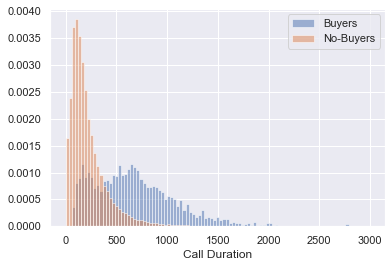

In [41]:
bins = np.linspace(0,3000,100)
plt.hist(buyers['duration'], bins=bins, alpha=0.5, density=True, label='Buyers')
plt.hist(no_buyers['duration'], bins=bins, alpha=0.5, density=True, label = 'No-Buyers')
plt.legend(loc="upper right")
plt.xlabel("Call Duration")
plt.show()

The call durations of No-buyers are left-skewed and most observations are at lower durations.

There are not many observations of long call durations for no-buyers.

On the other hand, the call durations of Buyers are more spread-out to higher calls.

This means that there is a correlation between Call duration and Subscribing.

It can be either longer duration calls more likely to end up with sale or(/and) the if the sale is made on phone and after the sale more talking is required then the calls that ended up in sales might cause the duration to be longer. But this information is not given in the problem.

### Balance

In [42]:
balance_data = df[['balance','y']]
buyers = balance_data[balance_data['y']==1]
no_buyers = balance_data[balance_data['y']==0]

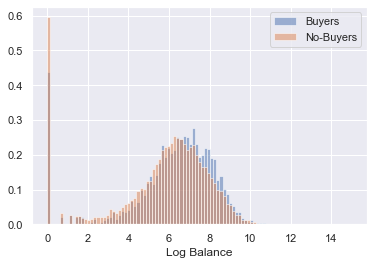

In [43]:
bins = np.linspace(0,15,100)
plt.hist(np.log(buyers['balance']+1), bins=bins, alpha=0.5, density=True, label='Buyers')
plt.hist(np.log(no_buyers['balance']+1), bins=bins, alpha=0.5, density=True, label = 'No-Buyers')
plt.legend(loc="upper right")
plt.xlabel("Log Balance")
plt.show()

The distribution of buyer balances are a shifted to right than the distribution of no-buyer balances

This means the higher balance means higher chances of subscribing but not quite significant.

In [44]:
print("No-Buyers balance mean:", no_buyers.balance.mean())
print("Buyers balance mean:", buyers.balance.mean())

No-Buyers balance mean: 1249.7525334195775
Buyers balance mean: 1588.495856353591
